In [2]:
pip install koreanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost scikit-learn lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:

import numpy as np
import pandas as pd

import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import matplotlib.patches as patches
import matplotlib.dates as mdates
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from collections import defaultdict
from itertools import combinations, chain
from datetime import datetime
import koreanize_matplotlib
import kss
from krwordrank.word import summarize_with_keywords
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
from konlpy.tag import Okt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

c:\Users\user\anaconda3\envs\ds_study\lib\site-packages\koreanize_matplotlib\koreanize_matplotlib.py:16: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  is_support_createFontList = LooseVersion(matplotlib.__version__) < '3.2'
c:\Users\user\anaconda3\envs\ds_study\lib\site-packages\setuptools\_distutils\version.py:337: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\user\anaconda3\envs\ds_study\lib\site-packages\xlrd\xlsx.py:39: DeprecationWarning: defusedxml.cElementTree is deprecated, import from defusedxml.ElementTree instead.
  try: import defusedxml.cElementTree as ET


In [5]:
df = pd.read_csv('./data_file/bank_data.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.shape

(41188, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df = df.reset_index()
df['age1'] = df['age']//10*10
df.head()

,index,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age1
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
1,1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
2,2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40
4,4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50


In [11]:
df['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [64]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [67]:
df[(df['job'].isin(['admin.', 'blue-collar', 'technician']))|(df['age1'].isin([20,30,40,50]))]['y'].value_counts()

y
0    35917
1     4201
Name: count, dtype: int64

In [68]:
df[(df['job'].isin(['retired', 'student']))|(df['age1'].isin([10,60,70,80]))]['y'].value_counts()

y
0    2156
1     847
Name: count, dtype: int64

In [69]:
847*100/2156

39.285714285714285

In [89]:
gf = {'':['customer'],
      '1%':[round(35917/100)],
      '3%':[round((35917/100)*3)],
      '5%':[round((35917/100)*5)],
      '10%':[round((35917/100)*10)]}

hf = {'':['customer'],
      '100':[round((2156+100)*(39/100))],
      '500':[round((2156+500)*(39/100))],
      '1000':[round((2156+1000)*(39/100))],
      '1500':[round((2156+1500)*(39/100))]}
gf1=pd.DataFrame(gf)
hf1=pd.DataFrame(hf)

In [90]:
gf1

,,1%,3%,5%,10%
0,customer,359,1078,1796,3592


In [91]:
hf1

,,100,500,1000,1500
0,customer,880,1036,1231,1426


In [92]:
print(gf1)
print(hf1)

              1%    3%    5%   10%
0  customer  359  1078  1796  3592
             100   500  1000  1500
0  customer  880  1036  1231  1426


# 범주형 변수

### 나이대별 정기예금 가입률
----
- 40대에서 최저
- 40대 이전 나이대 증가할수록 가입률 감소
- 40대 이후 나이대 증가할수록 가입률 증가

In [12]:
df_age = df[df['y']=='yes'].groupby(['age1', 'y'])['y'].count().reset_index(name='count')
age_total = df.groupby(['age1'])['y'].count().reset_index(name='total')
da = pd.merge(df_age, age_total, how='left', on='age1')
da['a_ratio'] = round(da['count']*100/da['total'])
da1 = da.drop(['y', 'total'], axis=1)
da = da.drop(['y', 'count', 'total'], axis=1)
da1

,age1,count,a_ratio
0,10,34,45.0
1,20,888,16.0
2,30,1715,10.0
3,40,834,8.0
4,50,697,10.0
5,60,251,35.0
6,70,144,45.0
7,80,72,51.0
8,90,5,50.0


### 직업별 정기예금 가입률
----
- 학생 가입률 최고, 육체 노동자 최저
- 은퇴자 높은 편

In [13]:
df_job = df[df['y']=='yes'].groupby(['job', 'y'])['y'].count().reset_index(name='count')
job_total = df.groupby(['job'])['y'].count().reset_index(name='total')
dj = pd.merge(df_job, job_total, how='left', on='job')
dj['j_ratio'] = round(dj['count']*100/dj['total'])
dj1 = dj.drop(['y', 'total'], axis=1)
dj = dj.drop(['y', 'count', 'total'], axis=1)
dj1

,job,count,j_ratio
0,admin.,1352,13.0
1,blue-collar,638,7.0
2,entrepreneur,124,9.0
3,housemaid,106,10.0
4,management,328,11.0
5,retired,434,25.0
6,self-employed,149,10.0
7,services,323,8.0
8,student,275,31.0
9,technician,730,11.0


### 결혼 여부별 정기예금 가입률
----
- 이혼, 기혼 최저로 동일
- 싱글 높음

In [14]:
df_mar = df[df['y']=='yes'].groupby(['marital', 'y'])['y'].count().reset_index(name='count')
mar_total = df.groupby(['marital'])['y'].count().reset_index(name='total')
dm = pd.merge(df_mar, mar_total, how='left', on='marital')
dm['m_ratio'] = round(dm['count']*100/dm['total'])
dm1 = dm.drop(['y', 'total'], axis=1)
dm = dm.drop(['y', 'count', 'total'], axis=1)
dm1

,marital,count,m_ratio
0,divorced,476,10.0
1,married,2532,10.0
2,single,1620,14.0
3,unknown,12,15.0


### 교육 수준별 정기예금 가입률
----
- 문맹 가입률 최고 표본 수가 너무 적음 -> 기각
- 교육 수준에 따라 상관관계 X

In [15]:
df_edu = df[df['y']=='yes'].groupby(['education', 'y'])['y'].count().reset_index(name='count')
edu_total = df.groupby(['education'])['y'].count().reset_index(name='total')
de = pd.merge(df_edu, edu_total, how='left', on='education')
de['e_ratio'] = round(de['count']*100/de['total'])
de1 = de.drop(['y', 'total'], axis=1)
de = de.drop(['y', 'count', 'total'], axis=1)

de1

,education,count,e_ratio
0,basic.4y,428,10.0
1,basic.6y,188,8.0
2,basic.9y,473,8.0
3,high.school,1031,11.0
4,illiterate,4,22.0
5,professional.course,595,11.0
6,university.degree,1670,14.0
7,unknown,251,15.0


### 연락 형태별 정기예금 가입률
----
- 개인 휴대폰이 전화에 비해 높음

In [16]:
df_con = df[df['y']=='yes'].groupby(['contact', 'y'])['y'].count().reset_index(name='count')
con_total = df.groupby(['contact'])['y'].count().reset_index(name='total')
dc = pd.merge(df_con, con_total, how='left', on='contact')
dc['c_ratio'] = round(dc['count']*100/dc['total'])
dc1 = dc.drop(['y', 'total'], axis=1)
dc = dc.drop(['y', 'count', 'total'], axis=1)
dc1

,contact,count,c_ratio
0,cellular,3853,15.0
1,telephone,787,5.0


In [17]:
df1 = df.copy()
df1 = pd.merge(df1,da,how='left', on='age1')
df1 = pd.merge(df1,dj,how='left', on='job')
df1 = pd.merge(df1,dm,how='left', on='marital')
df1 = pd.merge(df1,de,how='left', on='education')
df1 = pd.merge(df1,dc,how='left', on='contact')

In [18]:
df1['score'] = df1['a_ratio']+df1['j_ratio']+df1['m_ratio']+df1['e_ratio']+df1['c_ratio']
df1['score'] = MinMaxScaler().fit_transform(df1[['score']])*100
df1["grade"] = np.where(df1['score'] > 27.058824, "A",
                    np.where(df1['score'] > 20.000000, "B",
                    np.where(df1['score'] > 12.941176, "C", "D")))
df1.head()

,index,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age1,a_ratio,j_ratio,m_ratio,e_ratio,c_ratio,score,grade
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50,10.0,10.0,10.0,10.0,5.0,8.235294,D
1,1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50,10.0,8.0,10.0,11.0,5.0,7.058824,D
2,2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30,10.0,8.0,10.0,11.0,5.0,7.058824,D
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40,8.0,13.0,10.0,8.0,5.0,7.058824,D
4,4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50,10.0,8.0,10.0,11.0,5.0,7.058824,D


In [19]:
df1['score'].describe()

count    41188.000000
mean        21.563534
std         13.550828
min          0.000000
25%         12.941176
50%         20.000000
75%         27.058824
max        100.000000
Name: score, dtype: float64

In [20]:
df_gra = df1[df1['y']=='yes'].groupby(['grade', 'y'])['y'].count().reset_index(name='count')
gra_total = df1.groupby(['grade'])['y'].count().reset_index(name='total')
dg = pd.merge(df_gra, gra_total, how='left', on='grade')
dg['g_ratio'] = round(dg['count']*100/dg['total'])
dg = dg.drop(['y', 'total'], axis=1)

dg

,grade,count,g_ratio
0,A,2094,21.0
1,B,1394,12.0
2,C,711,7.0
3,D,441,5.0


In [21]:
for val in df1['grade'].unique():    
    print(val,':',df1[df1['grade']==val]['job'].value_counts().head())

D : job
blue-collar     4547
services        1350
technician      1184
admin.           539
entrepreneur     506
Name: count, dtype: int64
C : job
blue-collar    3424
admin.         2030
services       1655
technician      922
management      610
Name: count, dtype: int64
B : job
technician     3517
admin.         3001
management     1493
blue-collar    1062
services        691
Name: count, dtype: int64
A : job
admin.        4852
retired       1439
technician    1120
student        875
management     367
Name: count, dtype: int64


In [22]:
for val in df1['grade'].unique():    
    print(val,':',df1[df1['grade']==val]['marital'].value_counts().head())

D : marital
married     7406
divorced    1177
single       789
unknown        6
Name: count, dtype: int64
C : marital
married     6744
single      2004
divorced    1149
unknown       11
Name: count, dtype: int64
B : marital
married     7385
single      2967
divorced    1577
unknown       21
Name: count, dtype: int64
A : marital
single      5808
married     3393
divorced     709
unknown       42
Name: count, dtype: int64


In [23]:
for val in df1['grade'].unique():    
    print(val,':',df1[df1['grade']==val]['education'].value_counts().head())

D : education
basic.9y               2764
high.school            1953
basic.4y               1519
basic.6y               1209
professional.course    1182
Name: count, dtype: int64
C : education
high.school          2480
university.degree    2111
basic.9y             2075
basic.4y             1361
basic.6y              810
Name: count, dtype: int64
B : education
university.degree      3771
high.school            3217
professional.course    2669
basic.9y                889
basic.4y                625
Name: count, dtype: int64
A : education
university.degree      5760
high.school            1865
basic.4y                671
professional.course     671
unknown                 563
Name: count, dtype: int64


# 연속형 변수 

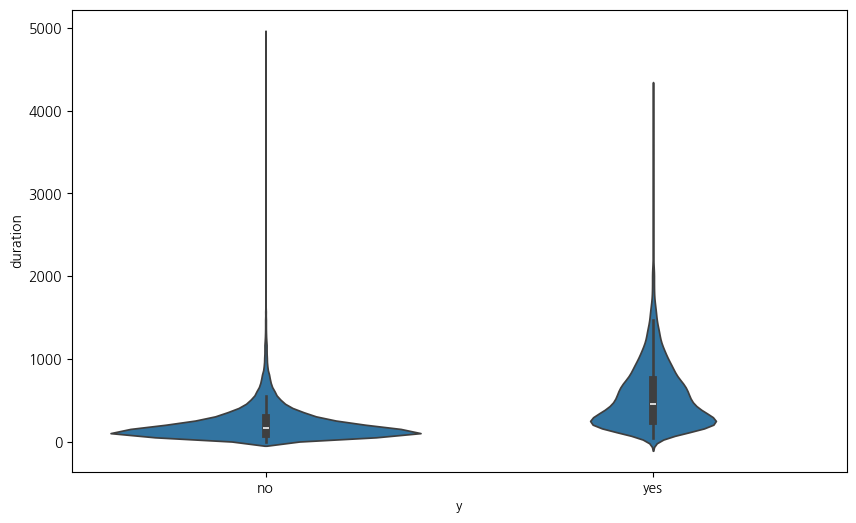

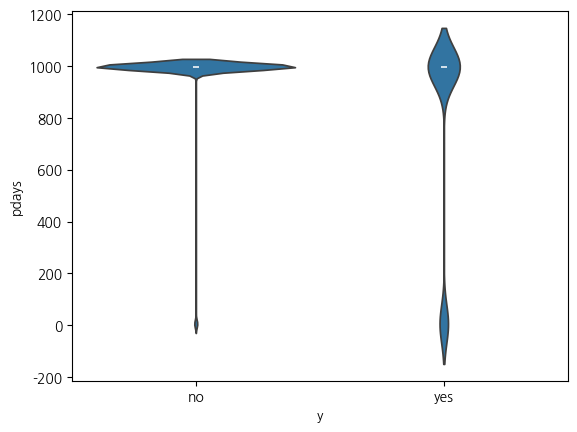

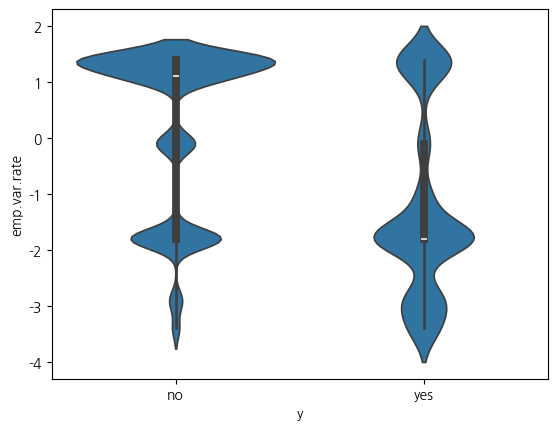

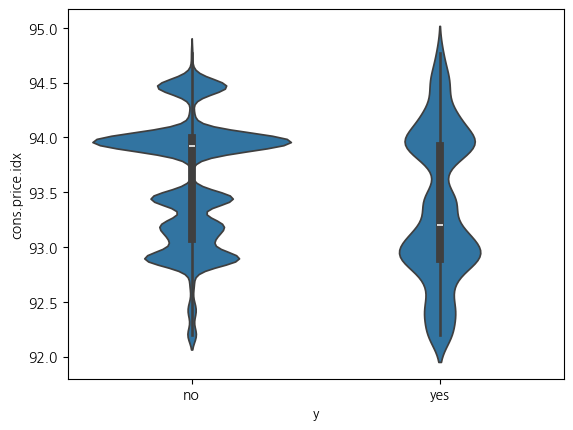

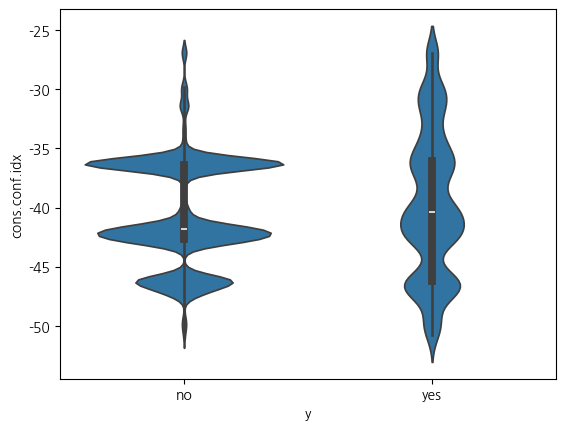

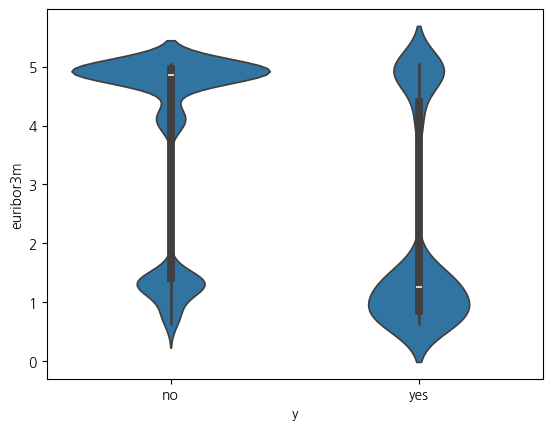

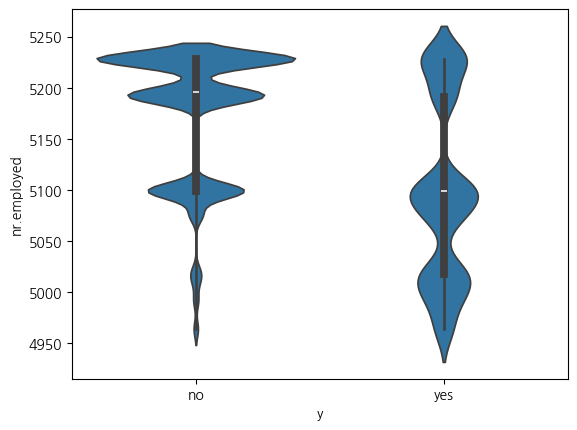

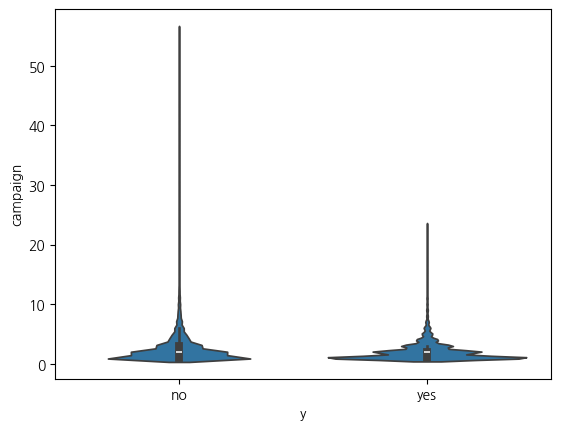

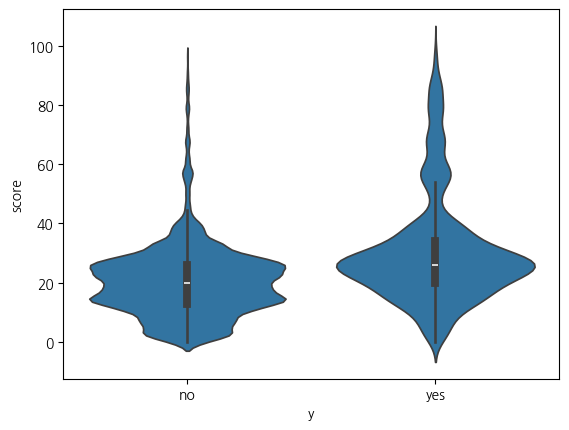

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='y', y='duration', data=df)
plt.show()

sns.violinplot(x='y', y='pdays', data=df)
plt.show()

sns.violinplot(x='y', y='emp.var.rate', data=df)
plt.show()

sns.violinplot(x='y', y='cons.price.idx', data=df)
plt.show()

sns.violinplot(x='y', y='cons.conf.idx', data=df)
plt.show()

sns.violinplot(x='y', y='euribor3m', data=df)
plt.show()

sns.violinplot(x='y', y='nr.employed', data=df)
plt.show()

sns.violinplot(x='y', y='campaign', data=df)
plt.show()

sns.violinplot(x='y', y='score', data=df1)
plt.show()

In [25]:
df1.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [26]:
df2 = df1.copy()
df2 = df2[df2['grade']=='A']
df2 = df2.drop(['a_ratio', 'j_ratio', 'm_ratio', 'e_ratio', 'c_ratio', 'score', 'grade'], axis=1)
df2['nr.employed'] = 5009
df2['emp.var.rate'] = -1.70
df2['cons.conf.idx'] = -40.40
df2.head()

,index,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age1
22,22,55,retired,single,high.school,no,yes,no,telephone,may,mon,342,1,999,0,nonexistent,-1.7,93.994,-40.4,4.857,5009,no,50
52,52,60,admin.,married,high.school,no,no,no,telephone,may,mon,253,1,999,0,nonexistent,-1.7,93.994,-40.4,4.857,5009,no,60
92,92,60,admin.,married,unknown,unknown,no,yes,telephone,may,mon,213,2,999,0,nonexistent,-1.7,93.994,-40.4,4.857,5009,no,60
110,110,60,retired,divorced,university.degree,unknown,no,no,telephone,may,mon,514,1,999,0,nonexistent,-1.7,93.994,-40.4,4.857,5009,no,60
150,150,60,blue-collar,married,basic.9y,unknown,no,no,telephone,may,mon,301,1,999,0,nonexistent,-1.7,93.994,-40.4,4.857,5009,no,60


In [27]:
df2.y.value_counts()

y
no     7858
yes    2094
Name: count, dtype: int64

# 정기예금 가입여부 예측 머신러닝

In [28]:
df.head()

,index,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age1
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
1,1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50
2,2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40
4,4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50


In [29]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [30]:
df['y']=np.where(df['y']=='yes', 1, 0)
df1['y']=np.where(df1['y']=='yes', 1, 0)

## 데이터 분리

In [31]:
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtype == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)

print("numerical_list :", numerical_list)
print("categorical_list :", categorical_list)

numerical_list : ['index', 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age1']
categorical_list : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [32]:
categorical_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
X = df.drop(['index', 'y', 'age1'], axis=1)
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for col in categorical_list:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])
    
x_train[categorical_list].head()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
df.head()

,index,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age1
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50
1,1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50
2,2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,30
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,40
4,4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50


In [34]:
categorical_list = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'day_of_week', 'poutcome']
X2 = df.drop(['index', 'y', 'age1', 'default', 'loan', 'duration'], axis=1)
y2 = df['y']

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

for col in categorical_list:
    le = LabelEncoder()
    x_train2[col] = le.fit_transform(x_train2[col])
    x_test2[col] = le.transform(x_test2[col])
    
x_train2[categorical_list].head()

scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

In [35]:
X3 = df.drop(['index', 'y', 'age1', 'default', 'loan', 'age', 'job', 'marital', 'education', 'housing', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'], axis=1)
y3 = df['y']

x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train3 = scaler.fit_transform(x_train3)
x_test3 = scaler.transform(x_test3)

In [36]:
model = XGBClassifier()

# 모델 학습
model.fit(x_train, y_train)

# 모델 예측
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

accuracyt = accuracy_score(y_train, y_pred_train)
conf_matrixt = confusion_matrix(y_train, y_pred_train)
class_reportt = classification_report(y_train, y_pred_train)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracyt}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrixt)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_reportt)
print("Classification Report:")
print(class_report)

Accuracy: 0.9614997745482293
Accuracy: 0.9138949583232177
Confusion Matrix:
[[25251   329]
 [  781  2470]]
Confusion Matrix:
[[10544   424]
 [  640   749]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     25580
           1       0.88      0.76      0.82      3251

    accuracy                           0.96     28831
   macro avg       0.93      0.87      0.90     28831
weighted avg       0.96      0.96      0.96     28831

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.64      0.54      0.58      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



In [37]:
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'learning_rate': [0.01, 0.03, 0.05, 0.1],
#     'n_estimators': [100, 200, 300, 400, 500],
#     'scale_pos_weight': [1,3,5,7,10],
#     'max_delta_step': [1,3,5,7,10]
# }

# # 정밀도와 재현율을 함께 고려한 스코어러 생성
# scorer = make_scorer(recall_score, average='binary')

# # GridSearchCV를 사용하여 하이퍼파라미터 검색
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=scorer, cv=5, verbose=1)
# grid_search.fit(x_train, y_train)

# # 최적의 하이퍼파라미터와 최고 정밀도 출력
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best recall Score:", grid_search.best_score_)

In [38]:
model = XGBClassifier(
    n_estimators=500,        
    learning_rate=0.01,       
    max_depth=3,            
    scale_pos_weight=7,       
    random_state=42,          
    use_label_encoder=False,   
    eval_metric='logloss',
    colsample_bytree= 0.5, 
    min_child_weight= 3,
    gamma= 0.5,
    subsample= 0.7,
    max_delta_step=10,
    objective='binary:logistic'
)

# 모델 학습
model.fit(x_train, y_train)

# 모델 예측
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

accuracyt = accuracy_score(y_train, y_pred_train)
conf_matrixt = confusion_matrix(y_train, y_pred_train)
class_reportt = classification_report(y_train, y_pred_train)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracyt}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrixt)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_reportt)
print("Classification Report:")
print(class_report)

Accuracy: 0.8563698796434394
Accuracy: 0.8549000566480537
Confusion Matrix:
[[21704  3876]
 [  265  2986]]
Confusion Matrix:
[[9280 1688]
 [ 105 1284]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     25580
           1       0.44      0.92      0.59      3251

    accuracy                           0.86     28831
   macro avg       0.71      0.88      0.75     28831
weighted avg       0.93      0.86      0.88     28831

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     10968
           1       0.43      0.92      0.59      1389

    accuracy                           0.85     12357
   macro avg       0.71      0.89      0.75     12357
weighted avg       0.93      0.85      0.88     12357



In [39]:
no = df[df['y']==0]
categorical_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
X_no = no.drop(['index', 'y', 'age1'], axis=1)

for col in categorical_list:
    le = LabelEncoder()
    X_no[col] = le.fit_transform(X_no[col])

scaler = StandardScaler()
X_no = scaler.fit_transform(X_no)

pred_proba = model.predict_proba(X_no)[:, 1]

In [57]:
no['%'] = pred_proba
no = no.drop(['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age1'], axis=1)
no.rename(columns={'index':'ID'}, inplace=True)

top_customers = no.sort_values(by='%', ascending=False).reset_index(drop=True)

In [59]:
top = top_customers[top_customers['%']>=0.85]
print('   잠재 고객 수: ', len(top))
print(top.head(20))

   잠재 고객 수:  3725
       ID         %
0   40713  0.978329
1   39783  0.976785
2   40836  0.974522
3   40257  0.974485
4   40024  0.973261
5   36110  0.972197
6   36028  0.971665
7   36043  0.970932
8   31484  0.970728
9   40566  0.969544
10  30580  0.967045
11  24008  0.966458
12  36245  0.966187
13  39594  0.964988
14  39301  0.964144
15  39308  0.964103
16  39981  0.963945
17  24004  0.963903
18  24043  0.963482
19  28222  0.962709


In [42]:
y_proba = model.predict_proba(x_test)[:, 1]

# 정밀도와 재현율 커브를 계산
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# 재현율이 최소 0.8 이상인 지점 찾기
desired_recall = 0.8
threshold_index = np.argmax(recall >= desired_recall)
best_threshold = thresholds[threshold_index]

print(f"Best threshold for desired recall of {desired_recall}: {best_threshold}")

# 새로운 임계치로 예측하기
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# 새 임계치에 따른 정밀도와 재현율 계산
adjusted_precision = precision_score(y_test, y_pred_adjusted)
adjusted_recall = recall_score(y_test, y_pred_adjusted)

print(f"Adjusted Precision: {adjusted_precision}")
print(f"Adjusted Recall: {adjusted_recall}")

Best threshold for desired recall of 0.8: 0.020860765129327774
Adjusted Precision: 0.11240592376790483
Adjusted Recall: 1.0


Initial Precision: 0.11240592376790483
Initial Recall: 1.0


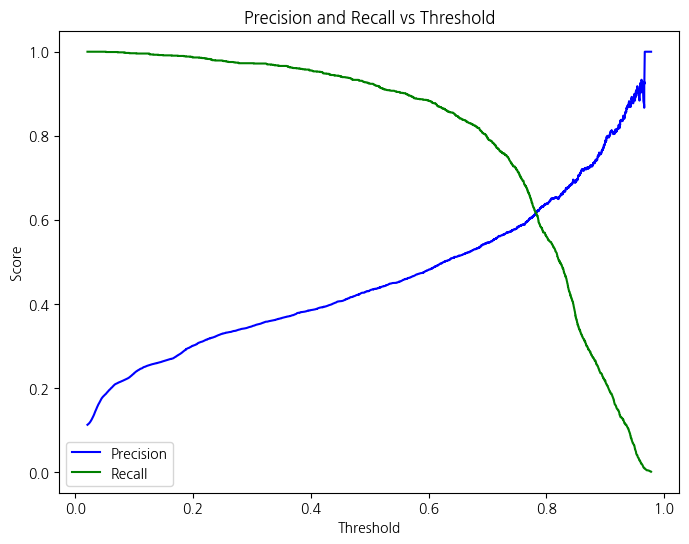

Best threshold for max F1-score: 0.7194734215736389
Adjusted Precision for best F1: 0.5618746708794102
Adjusted Recall for best F1: 0.7681785457163427
Accuracy: 0.9066116371287529
Confusion Matrix:
[[10136   832]
 [  322  1067]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10968
           1       0.56      0.77      0.65      1389

    accuracy                           0.91     12357
   macro avg       0.77      0.85      0.80     12357
weighted avg       0.92      0.91      0.91     12357



In [43]:
print(f"Initial Precision: {adjusted_precision}")
print(f"Initial Recall: {adjusted_recall}")

# 정밀도와 재현율 커브를 그래프로 확인
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.show()

# 재현율과 정밀도의 균형을 찾기 위해 F1-score 계산
f1_scores = 2 * (precision * recall) / (precision + recall)

# F1-score가 최대가 되는 임계치 선택
best_f1_index = np.argmax(f1_scores)
best_f1_threshold = thresholds[best_f1_index]

print(f"Best threshold for max F1-score: {best_f1_threshold}")

# 최적의 F1-score에 따른 예측
y_pred_f1 = (y_proba >= best_f1_threshold).astype(int)

# 새로운 임계치에 따른 정밀도와 재현율 계산
f1_precision = precision_score(y_test, y_pred_f1)
f1_recall = recall_score(y_test, y_pred_f1)

print(f"Adjusted Precision for best F1: {f1_precision}")
print(f"Adjusted Recall for best F1: {f1_recall}")

accuracyt = accuracy_score(y_test, y_pred_f1)
conf_matrixt = confusion_matrix(y_test, y_pred_f1)
class_reportt = classification_report(y_test, y_pred_f1)

print(f"Accuracy: {accuracyt}")
print("Confusion Matrix:")
print(conf_matrixt)
print("Classification Report:")
print(class_reportt)

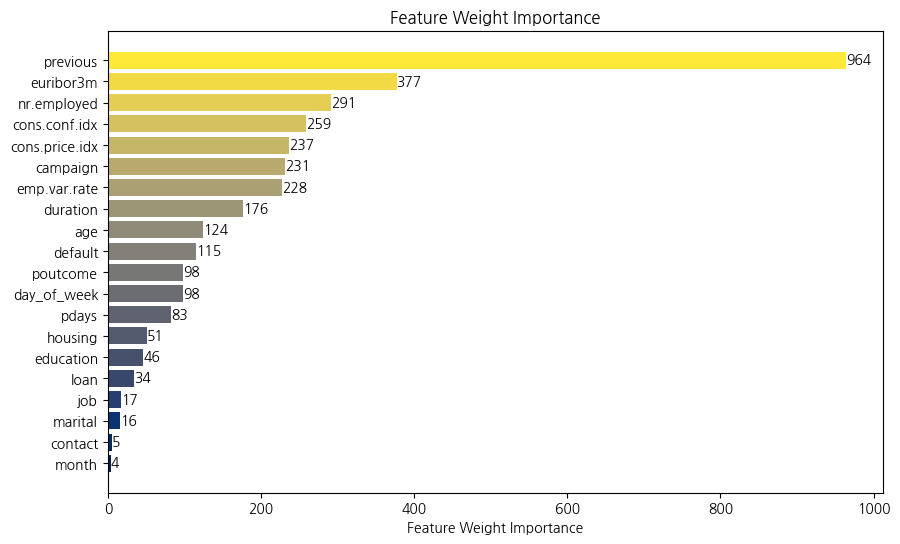

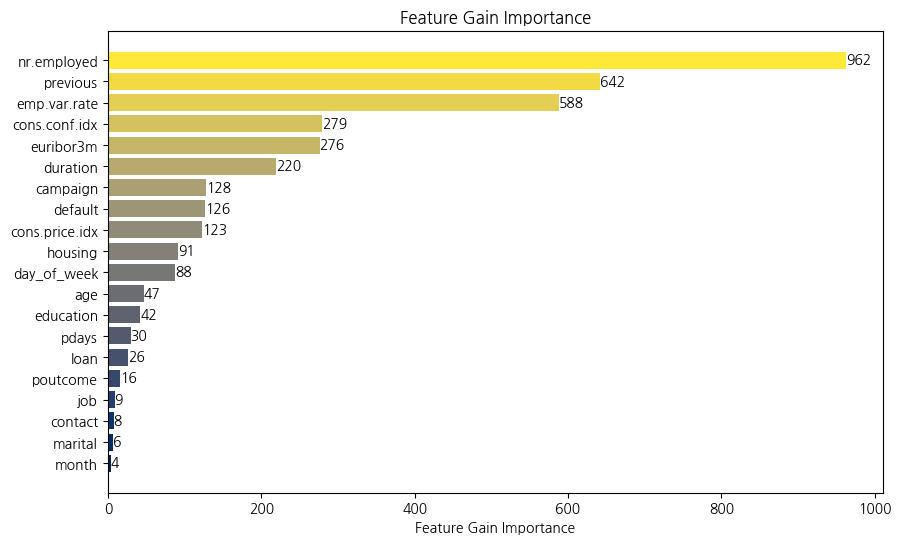

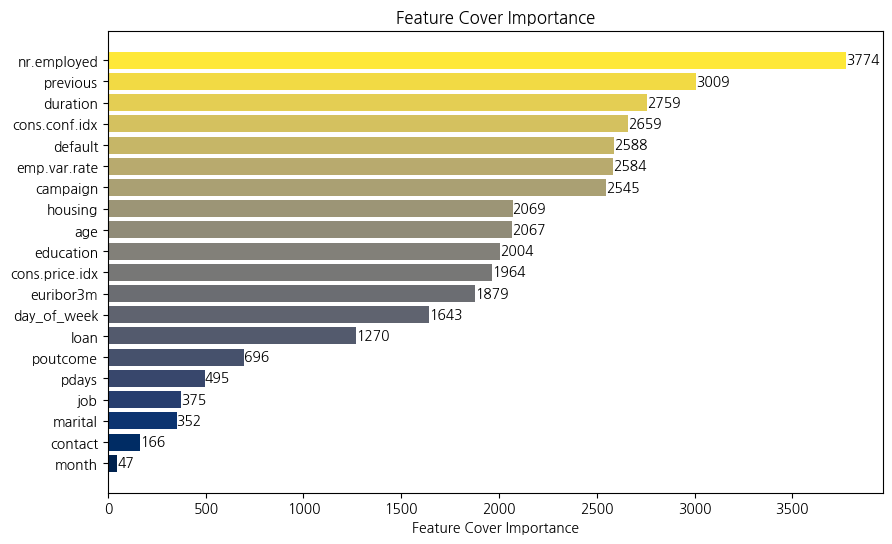

In [44]:
feature_names = ['age', 'job', 'marital', 'education', 'housing', 'contact', 'month',
                 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'duration', 'loan', 'default',
                 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                 'nr.employed']

# Booster 객체 가져오기 및 피처 이름 설정
booster = model.get_booster()
booster.feature_names = feature_names

def plot_feature_importance(importance_type):
    # 중요도 데이터 가져오기
    importance = booster.get_score(importance_type=importance_type)
    features = list(importance.keys())
    scores = list(importance.values())
    
    # 정렬 (중요도 높은 순서로)
    sorted_indices = np.argsort(scores)
    sorted_features = [features[i] for i in sorted_indices]
    sorted_scores = [scores[i] for i in sorted_indices]
    
    # 색상 설정 (피처마다 다른 색상)
    colors = plt.cm.cividis(np.linspace(0, 1, len(sorted_features)))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 바 플롯 생성
    bars = ax.barh(sorted_features, sorted_scores, color=colors)
    
    # 중요도 값을 소수점 첫째 자리까지 표시
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            ax.text(width, bar.get_y() + bar.get_height() / 2, 
                    f'{width:.0f}', va='center', ha='left')
    
    plt.xlabel(f'Feature {importance_type.capitalize()} Importance')
    plt.title(f'Feature {importance_type.capitalize()} Importance')
    plt.show()

# 중요도 시각화 - weight
plot_feature_importance('weight')

# 중요도 시각화 - gain
plot_feature_importance('gain')

# 중요도 시각화 - cover
plot_feature_importance('cover')

In [45]:
# model = XGBClassifier()

# # 모델 학습
# model.fit(x_train2, y_train2)

# # 모델 예측
# y_pred = model.predict(x_test2)
# y_pred_train = model.predict(x_train2)

# accuracyt = accuracy_score(y_train2, y_pred_train)
# conf_matrixt = confusion_matrix(y_train2, y_pred_train)
# class_reportt = classification_report(y_train2, y_pred_train)

# accuracy = accuracy_score(y_test2, y_pred)
# conf_matrix = confusion_matrix(y_test2, y_pred)
# class_report = classification_report(y_test2, y_pred)


# print(f"Accuracy: {accuracyt}")
# print(f"Accuracy: {accuracy}")
# print("Confusion Matrix:")
# print(conf_matrixt)
# print("Confusion Matrix:")
# print(conf_matrix)

# print("Classification Report:")
# print(class_reportt)
# print("Classification Report:")
# print(class_report)

In [46]:
# feature_names = ['age', 'job', 'marital', 'education', 'housing', 'contact', 'month','default', 'loan','duration',
#                  'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome']

# # Booster 객체 가져오기 및 피처 이름 설정
# booster = model.get_booster()
# booster.feature_names = feature_names

# def plot_feature_importance(importance_type):
#     # 중요도 데이터 가져오기
#     importance = booster.get_score(importance_type=importance_type)
#     features = list(importance.keys())
#     scores = list(importance.values())
    
#     # 정렬 (중요도 높은 순서로)
#     sorted_indices = np.argsort(scores)
#     sorted_features = [features[i] for i in sorted_indices]
#     sorted_scores = [scores[i] for i in sorted_indices]
    
#     # 색상 설정 (피처마다 다른 색상)
#     colors = plt.cm.cividis(np.linspace(0, 1, len(sorted_features)))
    
#     fig, ax = plt.subplots(figsize=(10, 6))
    
#     # 바 플롯 생성
#     bars = ax.barh(sorted_features, sorted_scores, color=colors)
    
#     # 중요도 값을 소수점 첫째 자리까지 표시
#     for bar in bars:
#         width = bar.get_width()
#         if width > 0:
#             ax.text(width, bar.get_y() + bar.get_height() / 2, 
#                     f'{width:.0f}', va='center', ha='left')
    
#     plt.xlabel(f'Feature {importance_type.capitalize()} Importance')
#     plt.title(f'Feature {importance_type.capitalize()} Importance')
#     plt.show()

# # 중요도 시각화 - weight
# plot_feature_importance('weight')

# # 중요도 시각화 - gain
# plot_feature_importance('gain')

# # 중요도 시각화 - cover
# plot_feature_importance('cover')

In [47]:
# model = XGBClassifier(
#     n_estimators=500,        
#     learning_rate=0.01,       
#     max_depth=3,            
#     scale_pos_weight=7,       
#     random_state=42,          
#     use_label_encoder=False,   
#     eval_metric='logloss',
#     colsample_bytree= 0.5, 
#     min_child_weight= 3,
#     gamma= 0.5,
#     subsample= 0.7,
#     max_delta_step=10,
#     objective='binary:logistic'
# )

# # 모델 학습
# model.fit(x_train3, y_train3)

# # 모델 예측
# y_pred = model.predict(x_test3)
# y_pred_train = model.predict(x_train3)

# accuracyt = accuracy_score(y_train3, y_pred_train)
# conf_matrixt = confusion_matrix(y_train3, y_pred_train)
# class_reportt = classification_report(y_train3, y_pred_train)

# accuracy = accuracy_score(y_test3, y_pred)
# conf_matrix = confusion_matrix(y_test3, y_pred)
# class_report = classification_report(y_test3, y_pred)


# print(f"Accuracy: {accuracyt}")
# print(f"Accuracy: {accuracy}")
# print("Confusion Matrix:")
# print(conf_matrixt)
# print("Confusion Matrix:")
# print(conf_matrix)

# print("Classification Report:")
# print(class_reportt)
# print("Classification Report:")
# print(class_report)

In [48]:
# feature_names = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']

# # Booster 객체 가져오기 및 피처 이름 설정
# booster = model.get_booster()
# booster.feature_names = feature_names

# def plot_feature_importance(importance_type):
#     # 중요도 데이터 가져오기
#     importance = booster.get_score(importance_type=importance_type)
#     features = list(importance.keys())
#     scores = list(importance.values())
    
#     # 정렬 (중요도 높은 순서로)
#     sorted_indices = np.argsort(scores)
#     sorted_features = [features[i] for i in sorted_indices]
#     sorted_scores = [scores[i] for i in sorted_indices]
    
#     # 색상 설정 (피처마다 다른 색상)
#     colors = plt.cm.cividis(np.linspace(0, 1, len(sorted_features)))
    
#     fig, ax = plt.subplots(figsize=(10, 6))
    
#     # 바 플롯 생성
#     bars = ax.barh(sorted_features, sorted_scores, color=colors)
    
#     # 중요도 값을 소수점 첫째 자리까지 표시
#     for bar in bars:
#         width = bar.get_width()
#         if width > 0:
#             ax.text(width, bar.get_y() + bar.get_height() / 2, 
#                     f'{width:.0f}', va='center', ha='left')
    
#     plt.xlabel(f'Feature {importance_type.capitalize()} Importance')
#     plt.title(f'Feature {importance_type.capitalize()} Importance')
#     plt.show()

# # 중요도 시각화 - weight
# plot_feature_importance('weight')

# # 중요도 시각화 - gain
# plot_feature_importance('gain')

# # 중요도 시각화 - cover
# plot_feature_importance('cover')

In [49]:
X_all = df.drop(['index', 'y', 'age1'], axis=1)
y_all = df['y']

In [50]:
categorical_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_list:
    le = LabelEncoder()
    X_all[col] = le.fit_transform(X_all[col])

scaler = StandardScaler()
X_all = scaler.fit_transform(X_all)

In [51]:
y_pred_proba_all = model.predict_proba(X_all)[:, 1]  # 가입할 확률 (클래스 1의 확률)

# 2. 현재 가입하지 않은 고객 필터링
non_subscribers = X_all[y_all == 0]  # 현재 가입 여부가 0인 데이터

# 3. 현재 가입하지 않은 고객의 가입 확률 예측
non_subscribers_proba = y_pred_proba_all[y_all == 0]

# 4. 특정 임계값 이상인 고객 선별 (예: 확률이 0.7 이상)
threshold = 0.8


non_subscribers_df = pd.DataFrame(X_all[y_all == 0])

# 가입 확률 데이터프레임에 추가
non_subscribers_df['probability'] = non_subscribers_proba

# 임계값 이상인 고객 필터링
potential_customers_df = non_subscribers_df[non_subscribers_df['probability'] >= threshold]

# 인덱스와 함께 데이터 출력
print("가입할 가능성이 높은 잠재 고객 수:", len(potential_customers_df))
print(potential_customers_df.index)

가입할 가능성이 높은 잠재 고객 수: 2675
Index([   37,   159,   193,   270,   577,   705,   824,   918,   924,   962,
       ...
       36517, 36518, 36523, 36527, 36528, 36533, 36534, 36538, 36540, 36545],
      dtype='int64', length=2675)


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500,    
    max_depth=3, random_state=42)

# 모델 훈련
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
y_pred_train = rf_model.predict(x_train)

accuracyt = accuracy_score(y_train, y_pred_train)
conf_matrixt = confusion_matrix(y_train, y_pred_train)
class_reportt = classification_report(y_train, y_pred_train)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracyt}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrixt)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_reportt)
print("Classification Report:")
print(class_report)

Accuracy: 0.9017377128784988
Accuracy: 0.9020797928299749
Confusion Matrix:
[[25445   135]
 [ 2698   553]]
Confusion Matrix:
[[10916    52]
 [ 1158   231]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     25580
           1       0.80      0.17      0.28      3251

    accuracy                           0.90     28831
   macro avg       0.85      0.58      0.61     28831
weighted avg       0.89      0.90      0.87     28831

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     10968
           1       0.82      0.17      0.28      1389

    accuracy                           0.90     12357
   macro avg       0.86      0.58      0.61     12357
weighted avg       0.89      0.90      0.87     12357



In [53]:
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# 모델 훈련
log_reg_model.fit(x_train, y_train)

y_pred = log_reg_model.predict(x_test)
y_pred_train = log_reg_model.predict(x_train)

accuracyt = accuracy_score(y_train, y_pred_train)
conf_matrixt = confusion_matrix(y_train, y_pred_train)
class_reportt = classification_report(y_train, y_pred_train)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracyt}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrixt)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_reportt)
print("Classification Report:")
print(class_report)

Accuracy: 0.9103048801637127
Accuracy: 0.9101723719349356
Confusion Matrix:
[[24927   653]
 [ 1933  1318]]
Confusion Matrix:
[[10683   285]
 [  825   564]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25580
           1       0.67      0.41      0.50      3251

    accuracy                           0.91     28831
   macro avg       0.80      0.69      0.73     28831
weighted avg       0.90      0.91      0.90     28831

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.66      0.41      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [54]:
top.head()

,index,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age1,%
0,40713,30,technician,single,professional.course,no,no,no,cellular,sep,tue,706,1,6,1,success,-1.1,94.199,-37.5,0.877,4963.6,0,30,0.978329
1,39783,29,blue-collar,single,basic.9y,no,no,no,telephone,jun,tue,1563,1,6,2,success,-1.7,94.055,-39.8,0.702,4991.6,0,20,0.976785
2,40836,30,student,single,professional.course,no,yes,no,cellular,sep,mon,1616,4,19,1,success,-1.1,94.199,-37.5,0.879,4963.6,0,30,0.974522
3,40257,35,admin.,married,university.degree,no,no,no,cellular,jul,mon,768,2,3,4,success,-1.7,94.215,-40.3,0.889,4991.6,0,30,0.974485
4,40024,37,admin.,single,university.degree,no,yes,no,cellular,jul,fri,844,2,6,3,success,-1.7,94.215,-40.3,0.790,4991.6,0,30,0.973261
